In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
dataset = pd.read_csv('bank_transactions_data_2.csv', sep=',')
dataset.head()
#dataset.info()


TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [3]:
dataset.describe()
dataset.isnull().sum()
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)

In [4]:
dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate'])
dataset['PreviousTransactionDate'] = pd.to_datetime(dataset['PreviousTransactionDate'])

In [5]:
dataset['TransactionYear'] = dataset['TransactionDate'].dt.year
dataset['TransactionMonth'] = dataset['TransactionDate'].dt.month
dataset['TransactionDay'] = dataset['TransactionDate'].dt.day

dataset['PreviousTransactionYear'] = dataset['PreviousTransactionDate'].dt.year
dataset['PreviousTransactionMonth'] = dataset['PreviousTransactionDate'].dt.month
dataset['PreviousTransactionDay'] = dataset['PreviousTransactionDate'].dt.day



In [6]:
dataset.drop(['TransactionDate', 'PreviousTransactionDate'], axis=1, inplace=True)

In [7]:
dataset["TransactionID"].value_counts()
dataset.drop(['TransactionID'], axis=1, inplace=True)

In [8]:
for col in dataset.columns:
    print(col, len(dataset[col].unique()), dataset[col].dtype)
    
    

AccountID 495 object
TransactionAmount 2455 float64
TransactionType 2 object
Location 43 object
DeviceID 681 object
IP Address 592 object
MerchantID 100 object
Channel 3 object
CustomerAge 63 int64
CustomerOccupation 4 object
TransactionDuration 288 int64
LoginAttempts 5 int64
AccountBalance 2510 float64
TransactionYear 2 int32
TransactionMonth 12 int32
TransactionDay 31 int32
PreviousTransactionYear 1 int32
PreviousTransactionMonth 1 int32
PreviousTransactionDay 1 int32


In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

categorical_columns = [col for col in dataset.columns if dataset[col].dtype == 'object']
numeric_columns = [col for col in dataset.columns if dataset[col].dtype != 'object']

dataset_copy = dataset.copy()
dataset_copy[categorical_columns] = dataset_copy[categorical_columns].apply(LabelEncoder().fit_transform)
dataset_copy[numeric_columns] = StandardScaler().fit_transform(dataset_copy[numeric_columns])



In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import  AgglomerativeClustering, DBSCAN # WE HAVE HERE THREE TYPE OF MODEL TO USE

def compare_algorithms(X, max_clusters):
  results = []
  cluster_range = range(2, max_clusters +1)

  #kmeans
  for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters) # the bigger it is, the better will be
    results.append(('KMeans',n_clusters,silhouette_avg))
  

  #agglomerativo
  for n_clusters in cluster_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agglomerative.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    results.append(('Agglomerative',n_clusters,silhouette_avg))

  #dbscan
  eps_values = np.arange(0.1,0.9,0.1)
  # eps come from 01 to 0.9
  for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X)
    if len(set(clusters)) > 1:
      silhouette_avg = silhouette_score(X, clusters)
      results.append(('DBSCAN',eps,silhouette_avg))

    return results

results = compare_algorithms(dataset_copy, 10)
df = pd.DataFrame(results, columns=['Agrupador','Clusters','Score'])
df.sort_values(by="Score", ascending=False).reset_index(drop=True)


c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lucas\Desktop\COURSES\SCIENCE_PROJECTS\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  Fi

Agrupador  Clusters     Score
0          KMeans         2  0.295788
1          KMeans         3  0.267838
2          KMeans         7  0.266684
3          KMeans         6  0.266214
4          KMeans         5  0.265636
5          KMeans         4  0.263420
6          KMeans         9  0.262929
7          KMeans         8  0.260043
8          KMeans        10  0.259199
9   Agglomerative         2  0.251623
10  Agglomerative         6  0.216985
11  Agglomerative         3  0.212518
12  Agglomerative         5  0.210856
13  Agglomerative         4  0.200260
14  Agglomerative         7  0.197018
15  Agglomerative         8  0.190818
16  Agglomerative         9  0.185411
17  Agglomerative        10  0.184671

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
clusters = kmeans.fit_predict(dataset_copy)
dataset['Cluster'] = clusters
dataset['Cluster'].value_counts()


Cluster
0    1272
1    1240
Name: count, dtype: int64

In [12]:
# Calculate distance of each point to its assigned cluster centroid
centroids = kmeans.cluster_centers_
distances = np.linalg.norm(dataset_copy.values - centroids[kmeans.labels_], axis=1)
dataset['Distance'] = distances

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)
dataset['Anomaly'] = dataset['Distance'] > threshold
dataset['Anomaly'].value_counts()

dataset[dataset['Anomaly'] == True].head()




AccountID  TransactionAmount TransactionType       Location DeviceID  \
20   AC00002              59.32           Debit    Los Angeles  D000152   
25   AC00041               7.49          Credit        Houston  D000671   
34   AC00365             255.26          Credit  San Francisco  D000357   
41   AC00480              34.02           Debit   Philadelphia  D000627   
44   AC00011             304.31           Debit     Louisville  D000685   

         IP Address MerchantID Channel  CustomerAge CustomerOccupation  ...  \
20    116.44.12.250       M040  Branch           71            Retired  ...   
25   81.248.235.147       M043  Online           65            Retired  ...   
34    92.214.76.157       M002  Branch           45             Doctor  ...   
41  109.105.179.186       M046  Online           38             Doctor  ...   
44   77.208.193.198       M005  Branch           27            Student  ...   

    AccountBalance  TransactionYear  TransactionMonth  TransactionDay  \
20         5750.89             2023                 2              28   
25         3634.67             2023                10              20   
34        14815.87             2023                10              27   
41        14214.48             2023                 1               9   
44          868.61             2023                 7              26   

    PreviousTransactionYear  PreviousTransactionMonth  PreviousTransactionDay  \
20                     2024                        11                       4   
25                     2024                        11                       4   
34                     2024                        11                       4   
41                     2024                        11                       4   
44                     2024                        11                       4   

    Cluster    Distance  Anomaly  
20        0  345.175482     True  
25        1  351.163122     True  
34        1  345.933169     True  
41        1  367.518377     True  
44        1  364.118802     True  

[5 rows x 22 columns]

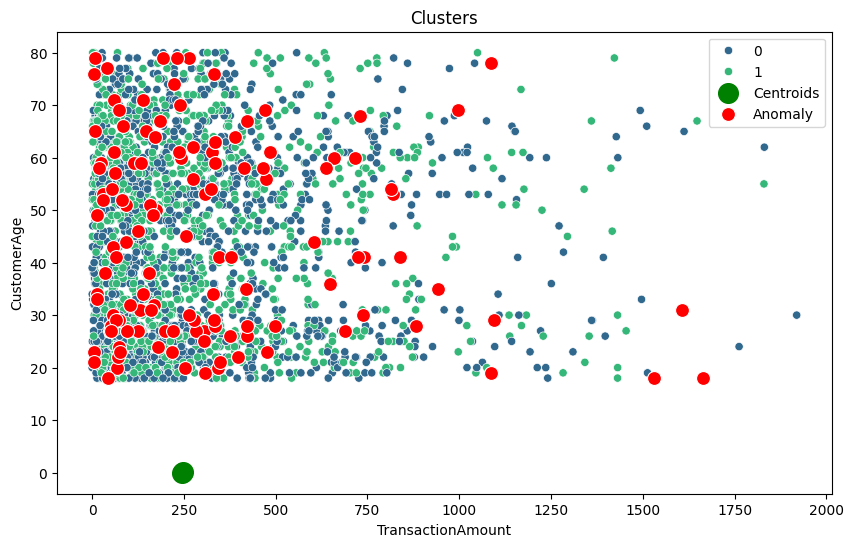

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='TransactionAmount', y='CustomerAge', hue='Cluster', palette='viridis')
S = plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='green', label='Centroids')
sns.scatterplot(data=dataset[dataset['Anomaly'] == True], x='TransactionAmount', y='CustomerAge', color='red', s=100, label='Anomaly')
plt.title('Clusters')
plt.show()


In [14]:
dataset[dataset['Anomaly'] == True].shape

(126, 22)

# Analisy of dataset

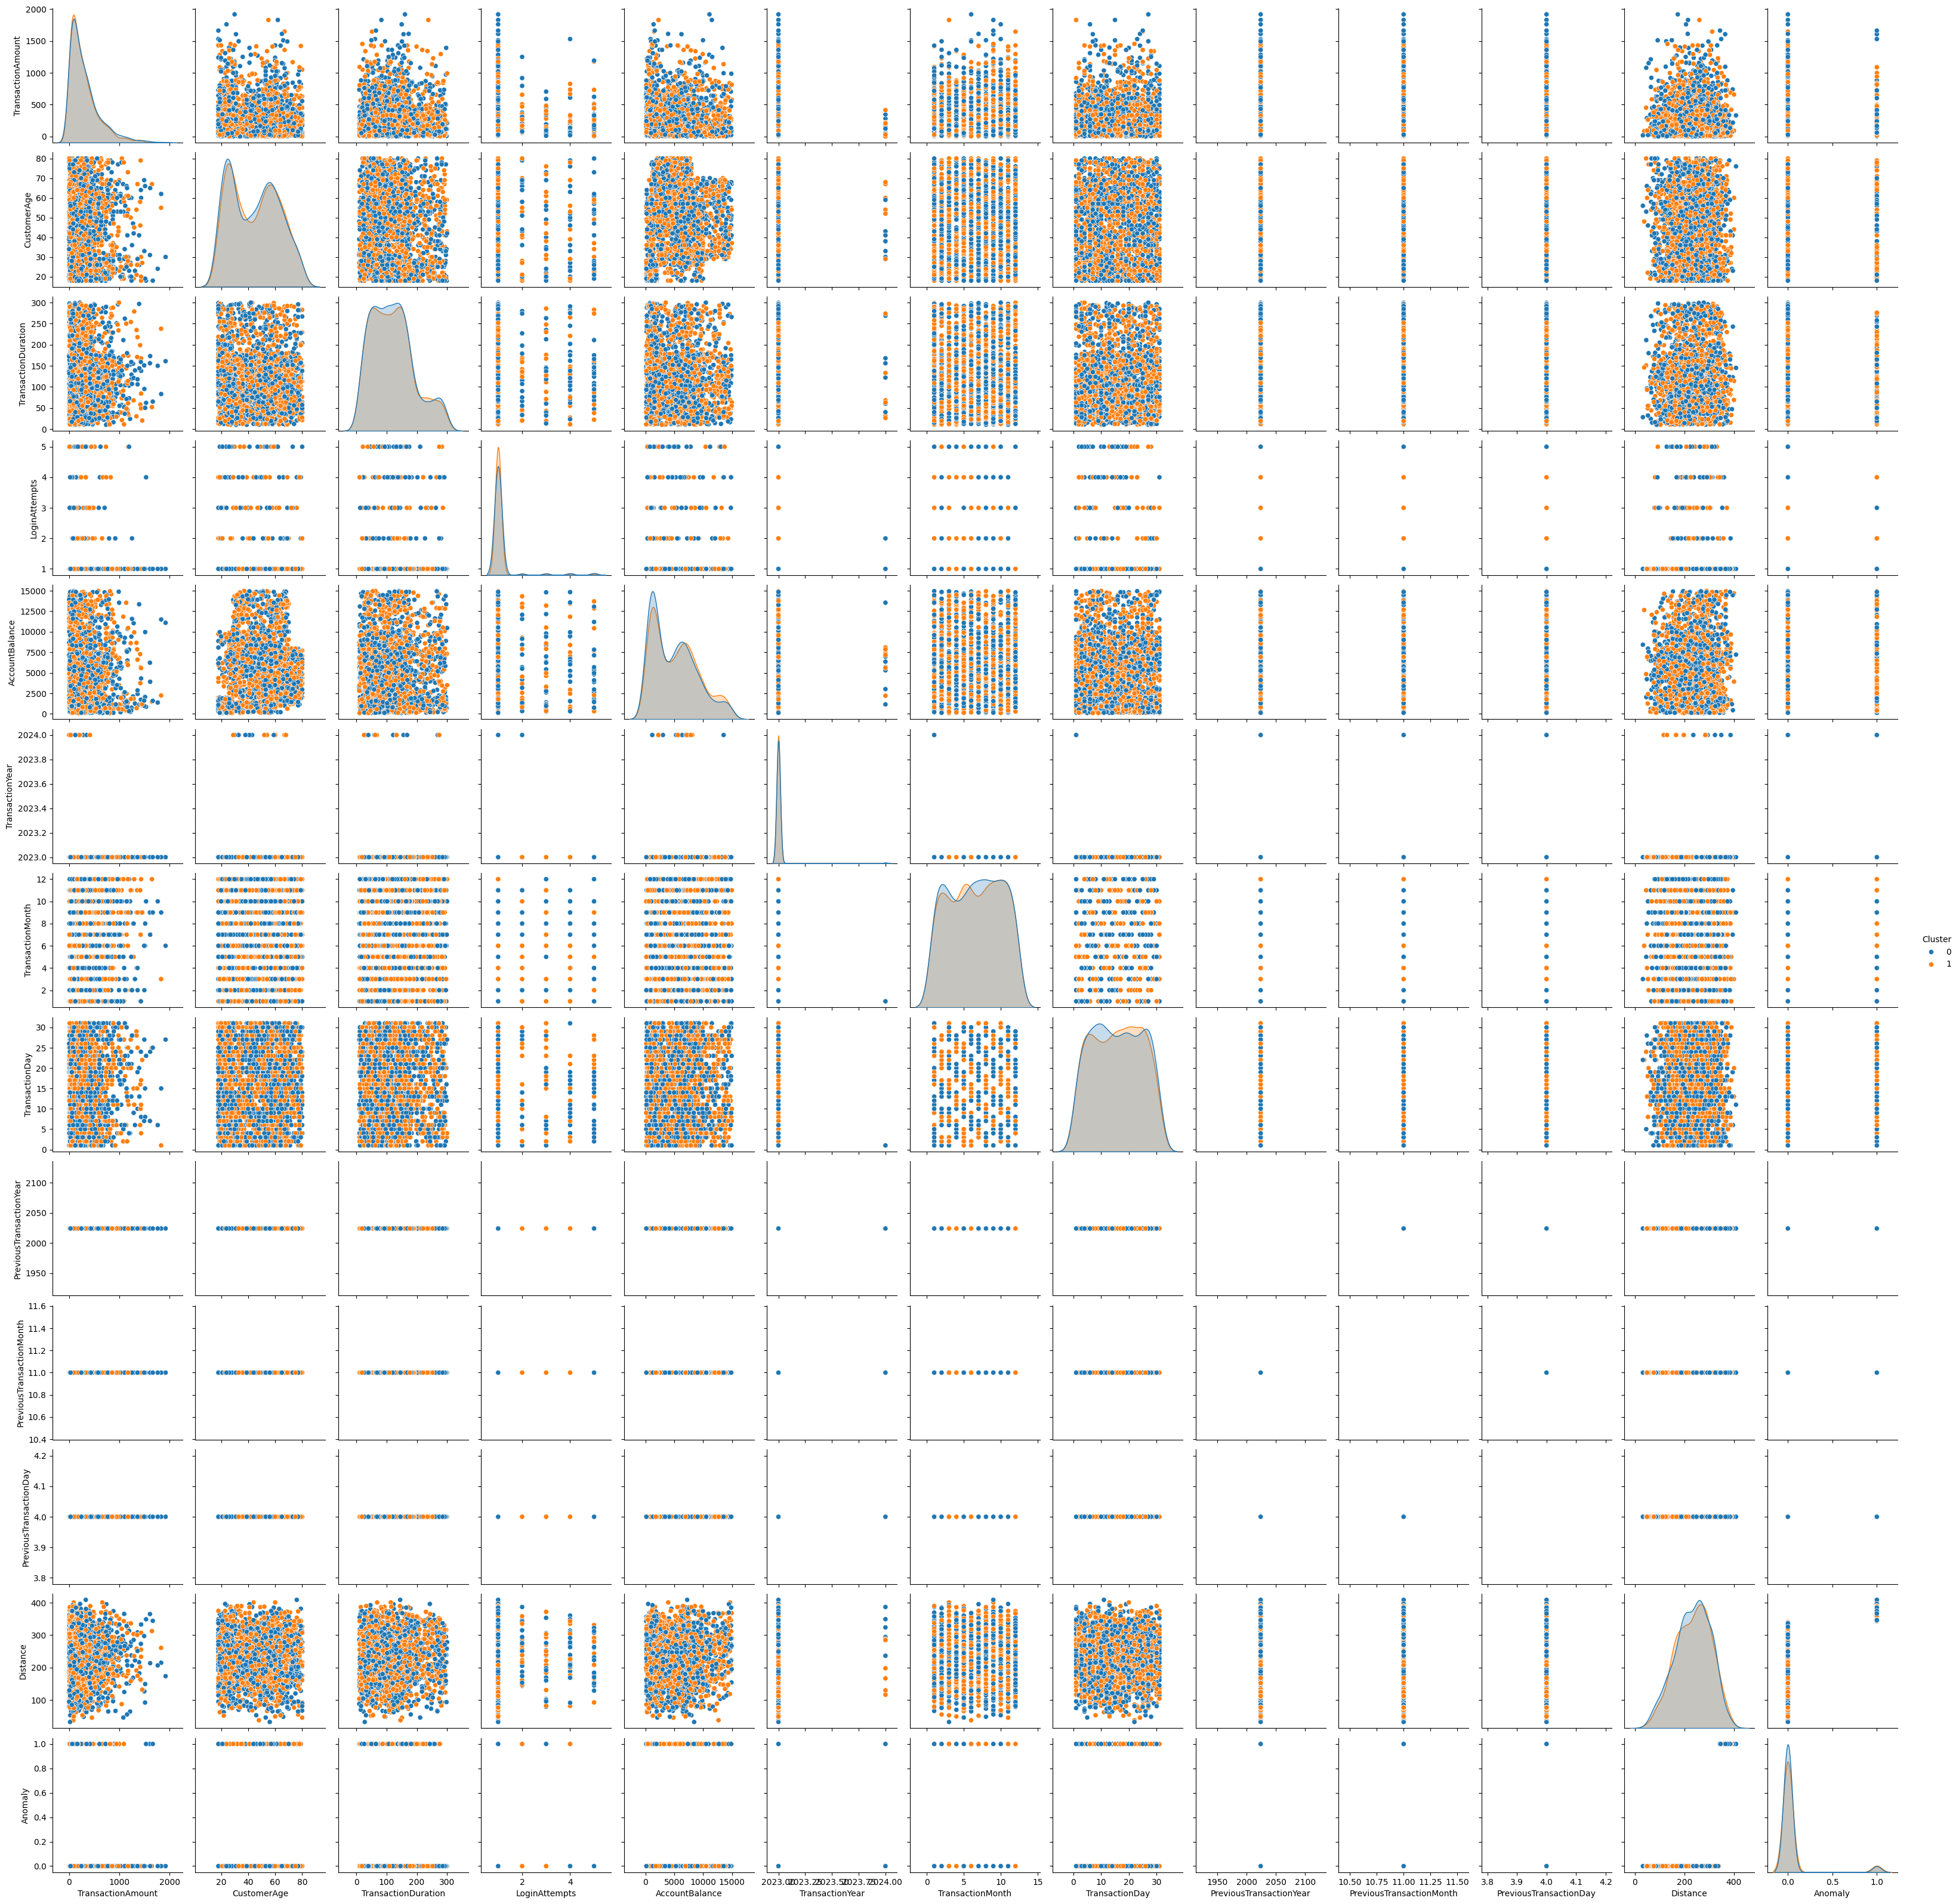

In [15]:
sns.pairplot(data=dataset, hue='Cluster')

In [16]:
dataset.columns

Index(['AccountID', 'TransactionAmount', 'TransactionType', 'Location',
       'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'TransactionYear', 'TransactionMonth',
       'TransactionDay', 'PreviousTransactionYear', 'PreviousTransactionMonth',
       'PreviousTransactionDay', 'Cluster', 'Distance', 'Anomaly'],
      dtype='object')

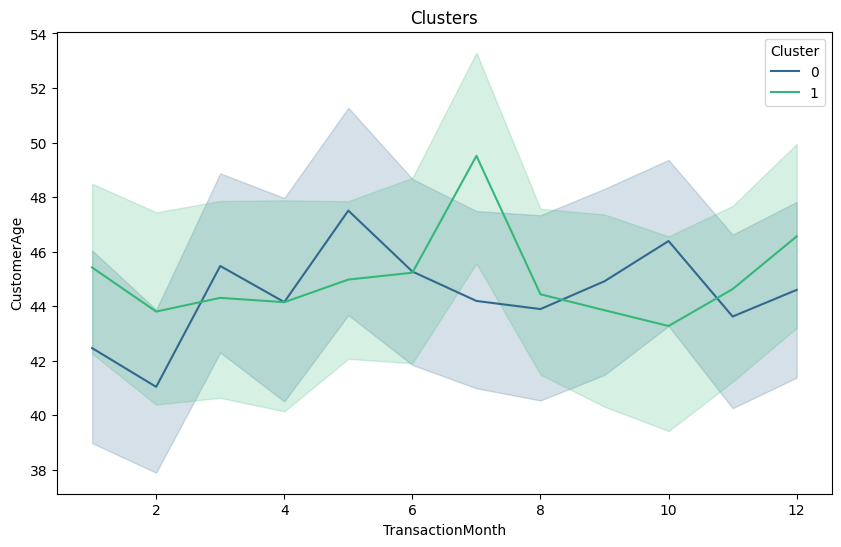

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset, x="TransactionMonth", y='CustomerAge', hue='Cluster', palette='viridis')
plt.title('Clusters')
plt.show()


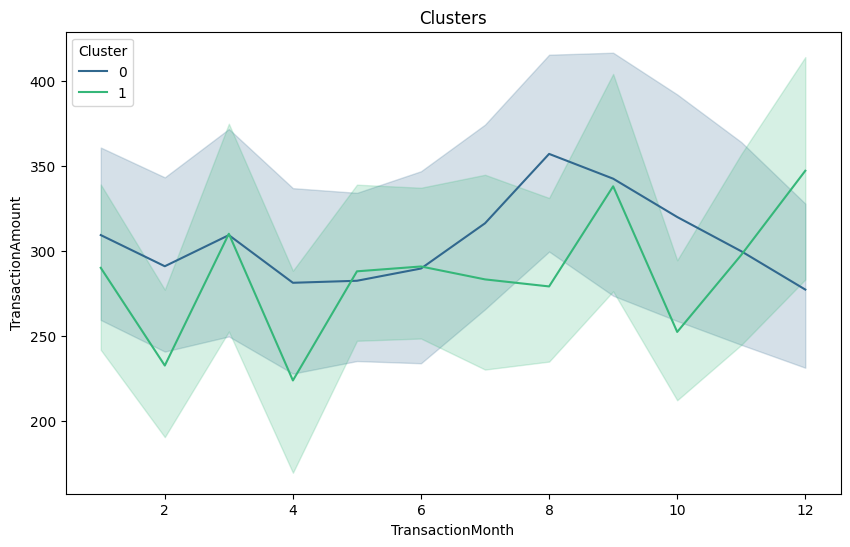

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset, x="TransactionMonth", y='TransactionAmount', hue='Cluster', palette='viridis')
plt.title('Clusters')
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_4672\1372491934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_anomalies, x='TransactionAmount', y='AccountID', palette='viridis')


<Axes: xlabel='TransactionAmount', ylabel='AccountID'>

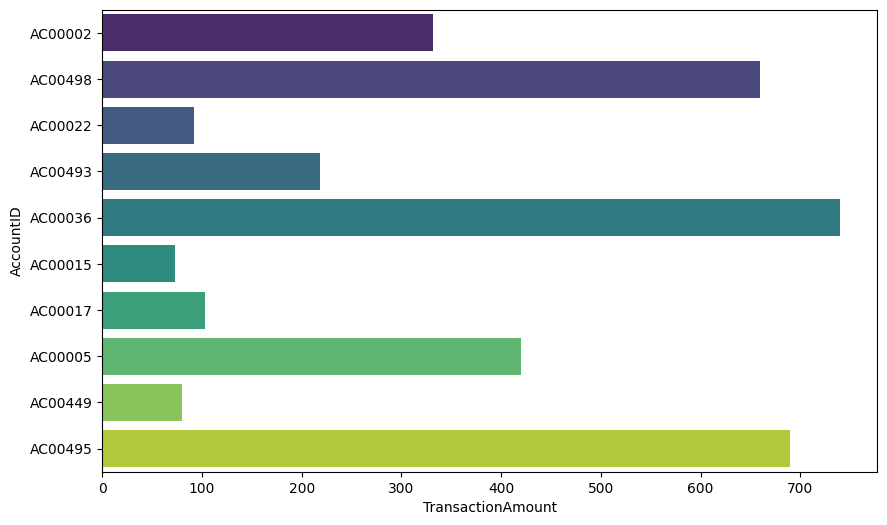

In [19]:
top_10_anomalies = dataset[dataset['Anomaly'] == True].sort_values(by='Distance', ascending=False).head(10)
top_10_anomalies

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_anomalies, x='TransactionAmount', y='AccountID', palette='viridis')

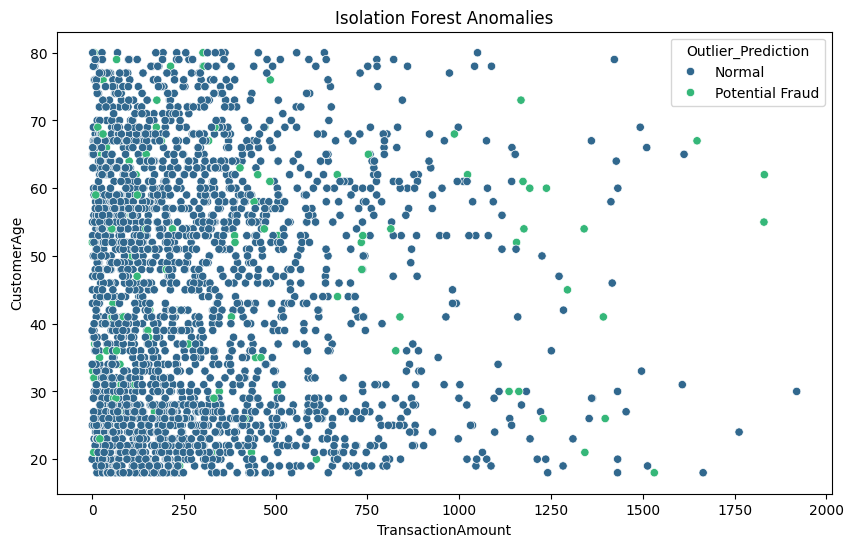

In [20]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to identify anomalies
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Set contamination rate to expected fraud rate
outlier_pred = iso_forest.fit_predict(dataset_copy)

# Map the results (-1 for outliers, 1 for normal) to descriptive labels
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
dataset['Outlier_Prediction'] = pd.Series(outlier_pred).map(outlier_mapping)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='TransactionAmount', y='CustomerAge', hue='Outlier_Prediction', palette='viridis')
plt.title('Isolation Forest Anomalies')
plt.show()


In [21]:
dataset['Outlier_Prediction'].loc[dataset['Outlier_Prediction'] == 'Potential Fraud'].value_counts()

Outlier_Prediction
Potential Fraud    126
Name: count, dtype: int64

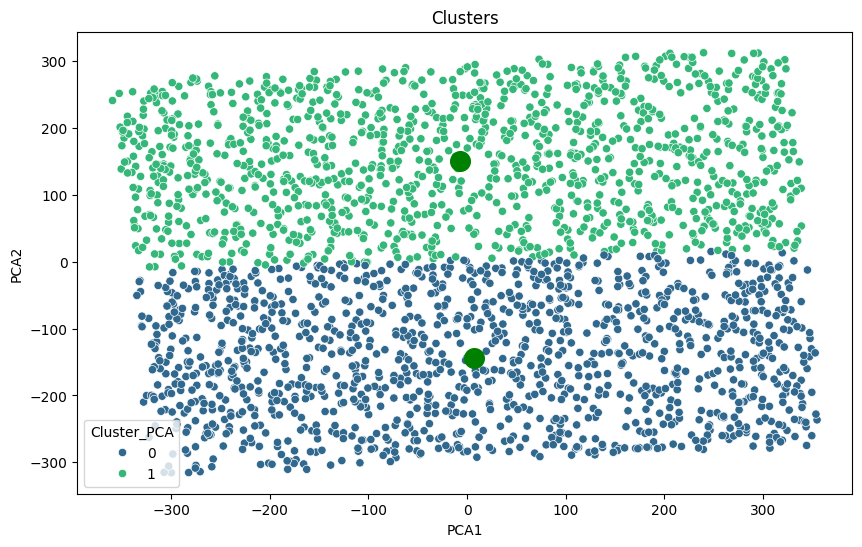

In [22]:
from sklearn.decomposition import PCA


PCA = PCA(n_components=2)
pca_components = PCA.fit_transform(dataset_copy)
dataset['PCA1'] = pca_components[:, 0]
dataset['PCA2'] = pca_components[:, 1]



kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
clusters = kmeans.fit_predict(pca_components)
dataset['Cluster_PCA'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='PCA1', y='PCA2', hue='Cluster_PCA', palette='viridis')
S = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, color='green', label='Centroids')
plt.title('Clusters')
plt.show()


In [24]:
# Calculate distance of each point to its assigned cluster centroid
centroids = kmeans.cluster_centers_
distances = np.linalg.norm(pca_components - centroids[kmeans.labels_], axis=1)
dataset['Distance PCA'] = distances

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)
dataset['Anomaly PCA'] = dataset['Distance PCA'] > threshold
dataset['Anomaly PCA'].value_counts()

dataset[dataset['Anomaly PCA'] == True].head()


AccountID  TransactionAmount TransactionType      Location DeviceID  \
8    AC00135             106.23          Credit       Detroit  D000690   
12   AC00392             494.52          Credit          Mesa  D000032   
44   AC00011             304.31           Debit    Louisville  D000685   
55   AC00374             316.95           Debit          Mesa  D000013   
69   AC00395             189.12          Credit  Indianapolis  D000684   

        IP Address MerchantID Channel  CustomerAge CustomerOccupation  ...  \
8    24.148.92.177       M035  Branch           51           Engineer  ...   
12  210.98.198.143       M057  Branch           24            Student  ...   
44  77.208.193.198       M005  Branch           27            Student  ...   
55   81.102.230.41       M052  Branch           25            Student  ...   
69  125.89.163.224       M040  Branch           32           Engineer  ...   

    PreviousTransactionDay  Cluster    Distance  Anomaly  Outlier_Prediction  \
8                        4        1  208.516422    False              Normal   
12                       4        0  197.956281    False              Normal   
44                       4        1  364.118802     True              Normal   
55                       4        0  311.518312    False              Normal   
69                       4        1  302.446187    False              Normal   

          PCA1        PCA2  Cluster_PCA  Distance PCA  Anomaly PCA  
8   328.403943   97.960302            1    339.786965         True  
12 -311.161704   11.017224            1    333.949490         True  
44  314.903137  251.919478            1    338.106946         True  
55 -344.610752  217.367231            1    343.909001         True  
69  338.186929 -197.334907            0    335.442418         True  

[5 rows x 28 columns]

In [28]:
dataset[dataset['Anomaly PCA'] == True].shape

(126, 28)